In [19]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1QTi7dJtNAfFR5mG0rd8K3ZGvEIfSn_DS
!unzip PersianData.zip

Downloading...
From: https://drive.google.com/uc?id=1QTi7dJtNAfFR5mG0rd8K3ZGvEIfSn_DS
To: /content/PersianData.zip
100% 7.46k/7.46k [00:00<00:00, 15.5MB/s]
Archive:  PersianData.zip
  inflating: 1.jpg                   
  inflating: 2.jpg                   
  inflating: 3.jpg                   
  inflating: 4.jpg                   
  inflating: 5.jpg                   


In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Convert Image to Binary

In [65]:
from PIL import Image, ImageDraw
import random

def convertImageToBinary(path):
    """
    Convert an image to a binary representation based on pixel intensity.

    Args:
        path (str): The file path to the input image.

    Returns:
        list: A binary representation of the image where white is represented by -1 and black is represented by 1.
    """
    # Open the image file.
    image = Image.open(path)

    # Create a drawing tool for manipulating the image.
    draw = ImageDraw.Draw(image)

    # Determine the image's width and height in pixels.
    width = image.size[0]
    height = image.size[1]

    # Load pixel values for the image.
    pix = image.load()

    # Define a factor for intensity thresholding.
    factor = 100

    # Initialize an empty list to store the binary representation.
    binary_representation = []

    # Loop through all pixels in the image.
    for i in range(width):
        for j in range(height):
            # Extract the Red, Green, and Blue (RGB) values of the pixel.
            red = pix[i, j][0]
            green = pix[i, j][1]
            blue = pix[i, j][2]

            # Calculate the total intensity of the pixel.
            total_intensity = red + green + blue

            # Determine whether the pixel should be white or black based on the intensity.
            if total_intensity > (((255 + factor) // 2) * 3):
                red, green, blue = 255, 255, 255  # White pixel
                binary_representation.append(-1)
            else:
                red, green, blue = 0, 0, 0  # Black pixel
                binary_representation.append(1)

            # Set the pixel color accordingly.
            draw.point((i, j), (red, green, blue))

    # Clean up the drawing tool.
    del draw

    # Return the binary representation of the image.
    return binary_representation

# Noise Generator

In [66]:
from PIL import Image, ImageDraw
import random

def generateNoisyImages():
    # List of image file paths
    image_paths = [
        "/content/1.jpg",
        "/content/2.jpg",
        "/content/3.jpg",
        "/content/4.jpg",
        "/content/5.jpg"
    ]

    for i, image_path in enumerate(image_paths, start=1):
        noisy_image_path = f"/content/noisy{i}.jpg"
        getNoisyBinaryImage(image_path, noisy_image_path)
        print(f"Noisy image for {image_path} generated and saved as {noisy_image_path}")

def getNoisyBinaryImage(input_path, output_path):
    """
    Add noise to an image and save it as a new file.

    Args:
        input_path (str): The file path to the input image.
        output_path (str): The file path to save the noisy image.
    """
    # Open the input image.
    image = Image.open(input_path)

    # Create a drawing tool for manipulating the image.
    draw = ImageDraw.Draw(image)

    # Determine the image's width and height in pixels.
    width = image.size[0]
    height = image.size[1]

    # Load pixel values for the image.
    pix = image.load()

    # Define a factor for introducing noise.
    noise_factor = 1700

    # Loop through all pixels in the image.
    for i in range(width):
        for j in range(height):
            # Generate a random noise value within the specified factor.
            rand = random.randint(-noise_factor, noise_factor)

            # Add the noise to the Red, Green, and Blue (RGB) values of the pixel.
            red = pix[i, j][0] + rand
            green = pix[i, j][1] + rand
            blue = pix[i, j][2] + rand

            # Ensure that RGB values stay within the valid range (0-255).
            if red < 0:
                red = 0
            if green < 0:
                green = 0
            if blue < 0:
                blue = 0
            if red > 255:
                red = 255
            if green > 255:
                green = 255
            if blue > 255:
                blue = 255

            # Set the pixel color accordingly.
            draw.point((i, j), (red, green, blue))

    # Save the noisy image as a file.
    image.save(output_path, "JPEG")

    # Clean up the drawing tool.
    del draw

# Generate noisy images and save them
generateNoisyImages()


Noisy image for /content/1.jpg generated and saved as /content/noisy1.jpg
Noisy image for /content/2.jpg generated and saved as /content/noisy2.jpg
Noisy image for /content/3.jpg generated and saved as /content/noisy3.jpg
Noisy image for /content/4.jpg generated and saved as /content/noisy4.jpg
Noisy image for /content/5.jpg generated and saved as /content/noisy5.jpg


# 2) Hamming Network for Noisy Image Detection

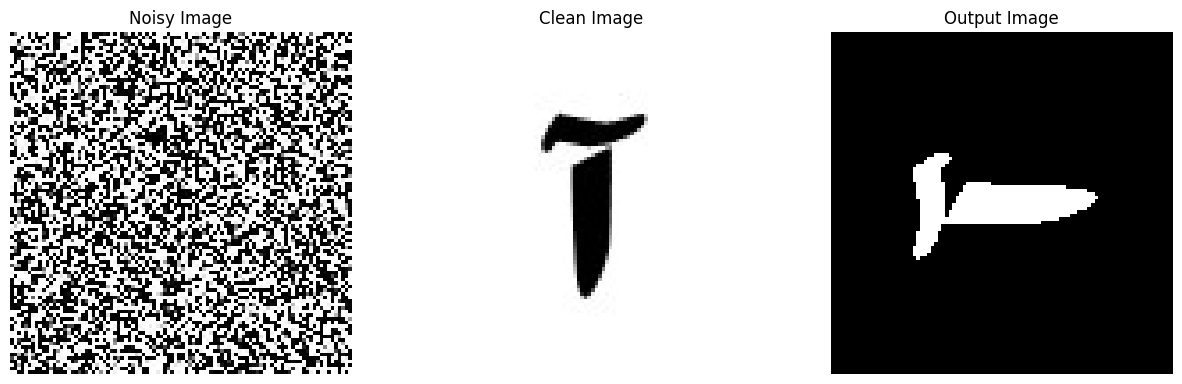

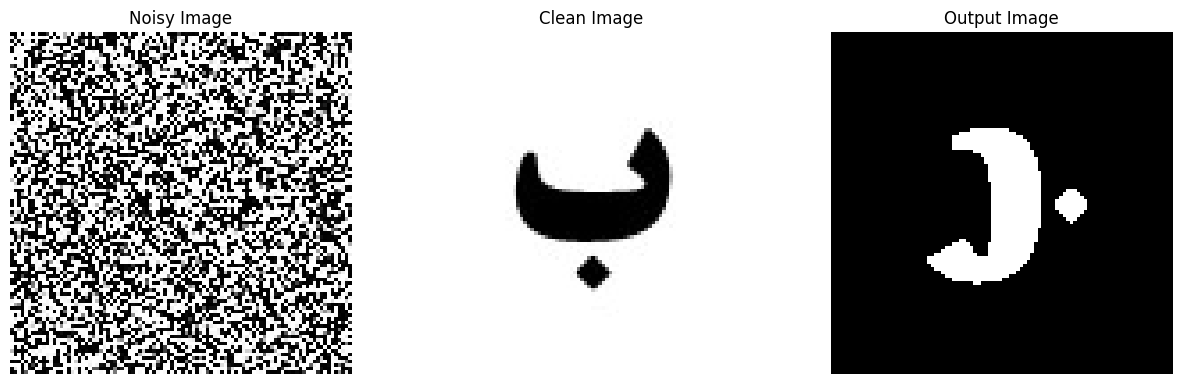

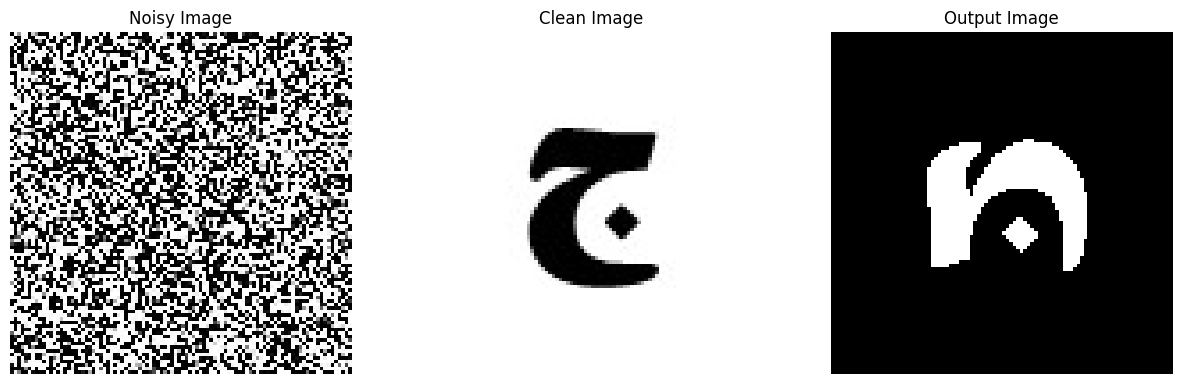

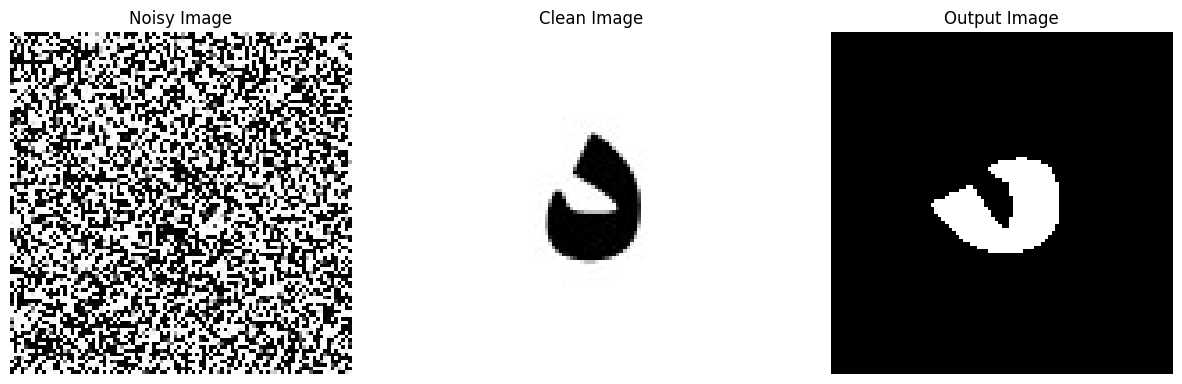

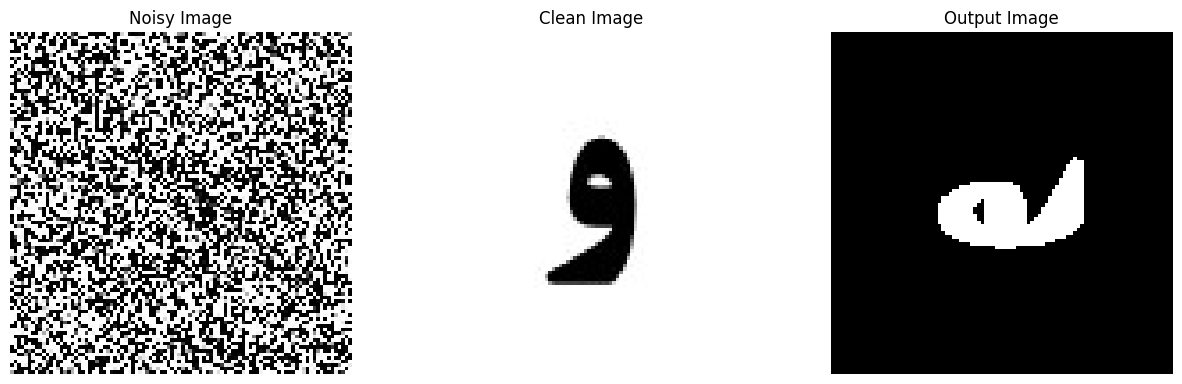

In [67]:
def convertImageToBinary(path):
    image = Image.open(path).convert("RGB")  # Ensure the image is in RGB mode
    width, height = image.size
    pix = image.load()
    factor = 100
    binary_representation = []
    for i in range(width):
        for j in range(height):
            red, green, blue = pix[i, j][:3]
            total_intensity = red + green + blue
            if total_intensity > (((255 + factor) // 2) * 3):
                binary_representation.append(-1)  # White pixel
            else:
                binary_representation.append(1)   # Black pixel
    return np.array(binary_representation)

def hamming_network(noisy_pattern, clean_patterns):
    similarities = [np.dot(noisy_pattern, clean_pattern) for clean_pattern in clean_patterns]
    best_match_index = np.argmax(similarities)
    return clean_patterns[best_match_index]

def display_images(noisy_image_path, clean_image_path, output_pattern, width, height):
    noisy_image = Image.open(noisy_image_path)
    clean_image = Image.open(clean_image_path)

    # Convert the binary pattern back to an image
    output_image_array = output_pattern.reshape((height, width))
    output_image_array = ((output_image_array + 1) / 2 * 255).astype(np.uint8)  # Normalize to 0–255
    output_image = Image.fromarray(output_image_array, mode="L")

    # Plot the images
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].imshow(noisy_image)
    axs[0].set_title("Noisy Image")
    axs[0].axis('off')

    axs[1].imshow(clean_image)
    axs[1].set_title("Clean Image")
    axs[1].axis('off')

    axs[2].imshow(output_image, cmap='gray')
    axs[2].set_title("Output Image")
    axs[2].axis('off')

    plt.show()

# Example usage
clean_image_paths = [
    "/content/1.jpg",
    "/content/2.jpg",
    "/content/3.jpg",
    "/content/4.jpg",
    "/content/5.jpg"
]

noisy_image_paths = [
    "/content/noisy1.jpg",
    "/content/noisy2.jpg",
    "/content/noisy3.jpg",
    "/content/noisy4.jpg",
    "/content/noisy5.jpg"
]

# Convert clean images to binary patterns
clean_patterns = [convertImageToBinary(path) for path in clean_image_paths]

# Compare noisy images to clean patterns
for noisy_image_path, clean_image_path in zip(noisy_image_paths, clean_image_paths):
    noisy_pattern = convertImageToBinary(noisy_image_path)
    matched_pattern = hamming_network(noisy_pattern, clean_patterns)

    # Get image dimensions from one of the clean images
    width, height = Image.open(clean_image_path).size

    # Display the noisy image, clean image, and matched output
    display_images(noisy_image_path, clean_image_path, matched_pattern, width, height)


# 3) Missing Point Generator

In [63]:
from PIL import Image, ImageDraw
import random

def generateMissingPointImages():
    # List of image file paths
    image_paths = [
        "/content/1.jpg",
        "/content/2.jpg",
        "/content/3.jpg",
        "/content/4.jpg",
        "/content/5.jpg"
    ]

    for i, image_path in enumerate(image_paths, start=1):
        missing_point_image_path = f"/content/missing_point{i}.jpg"
        getMissingPointImage(image_path, missing_point_image_path)
        print(f"Missing point image for {image_path} generated and saved as {missing_point_image_path}")

def getMissingPointImage(input_path, output_path):
    # Open the input image.
    image = Image.open(input_path)

    # Create a drawing tool for manipulating the image.
    draw = ImageDraw.Draw(image)

    # Determine the image's width and height in pixels.
    width = image.size[0]
    height = image.size[1]

    # Define the percentage of missing points.
    missing_percentage = 120  # Percentage of pixels to make "missing"
    total_pixels = width * height
    num_missing = total_pixels * missing_percentage // 100

    # Randomly select pixels to make "missing".
    for _ in range(num_missing):
        x = random.randint(0, width - 1)
        y = random.randint(0, height - 1)

        # Set the selected pixel to black (or white to simulate missing points).
        draw.point((x, y), (255, 255, 255))  # Black pixel (you can change to white as needed)

    # Save the image with missing points as a file.
    image.save(output_path, "JPEG")

    # Clean up the drawing tool.
    del draw

# Generate images with missing points and save them
generateMissingPointImages()


Missing point image for /content/1.jpg generated and saved as /content/missing_point1.jpg
Missing point image for /content/2.jpg generated and saved as /content/missing_point2.jpg
Missing point image for /content/3.jpg generated and saved as /content/missing_point3.jpg
Missing point image for /content/4.jpg generated and saved as /content/missing_point4.jpg
Missing point image for /content/5.jpg generated and saved as /content/missing_point5.jpg


# 3) Hamming Network for Missing Image Detection

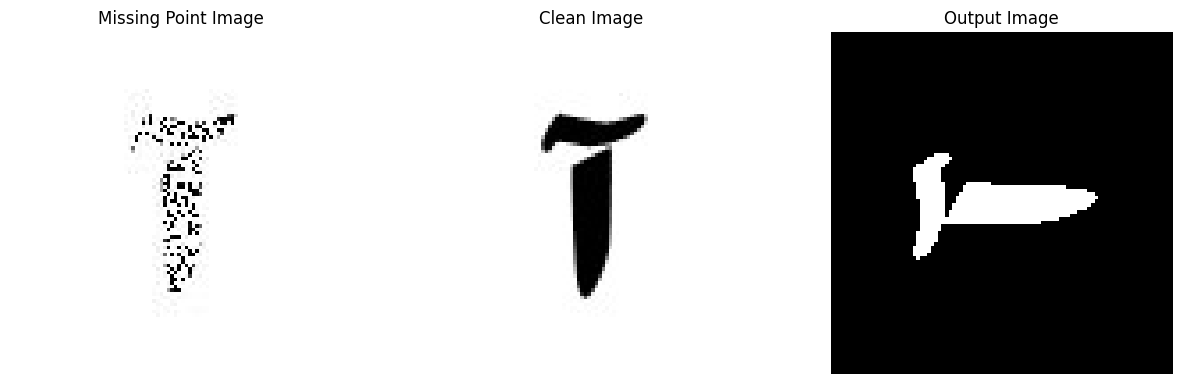

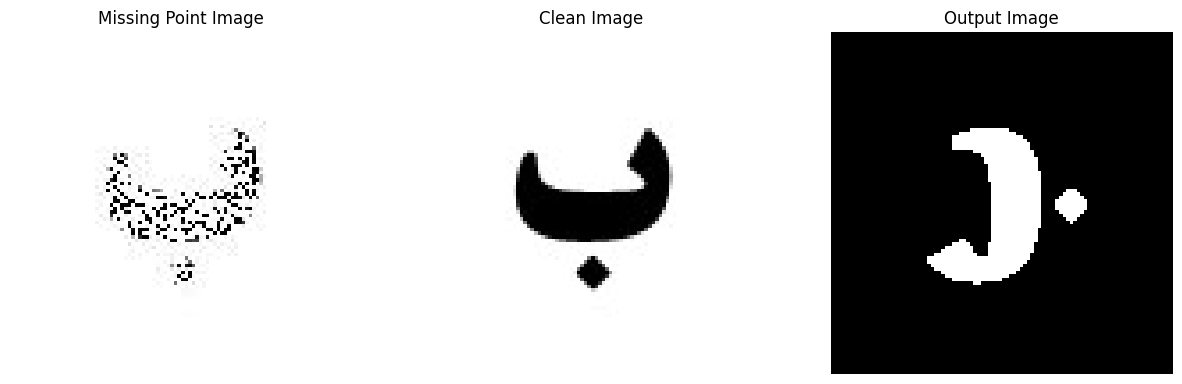

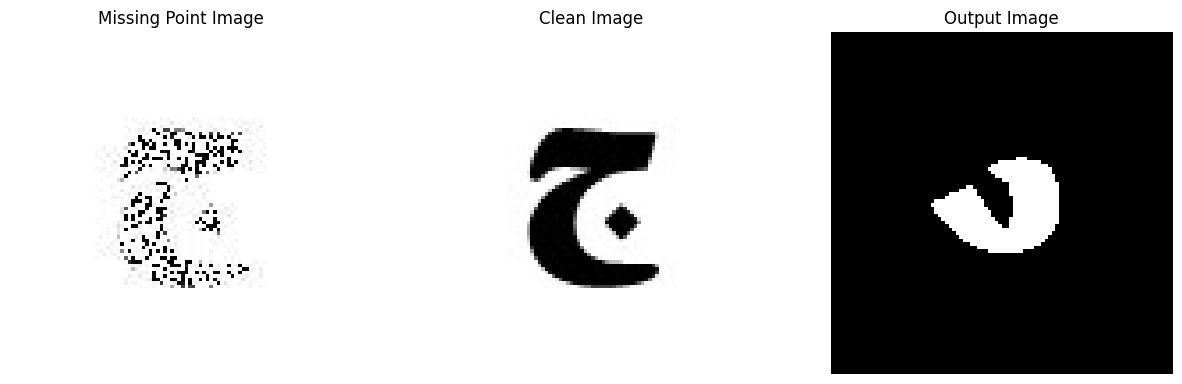

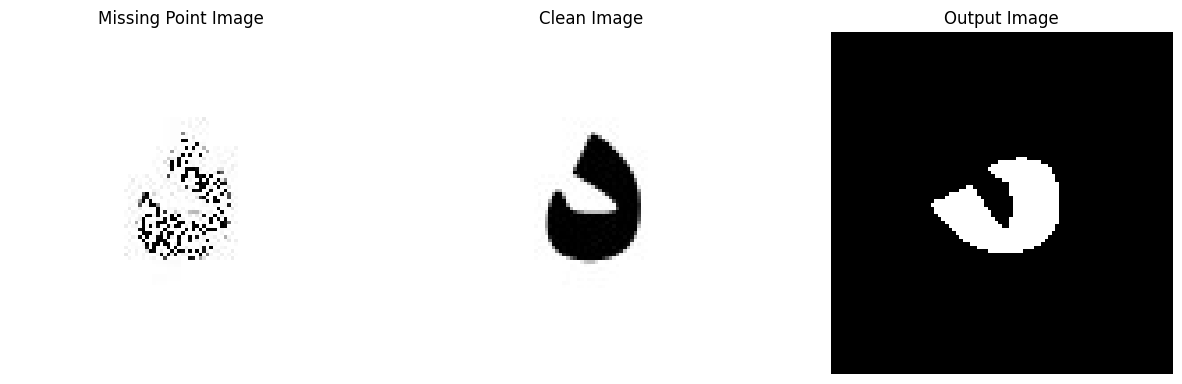

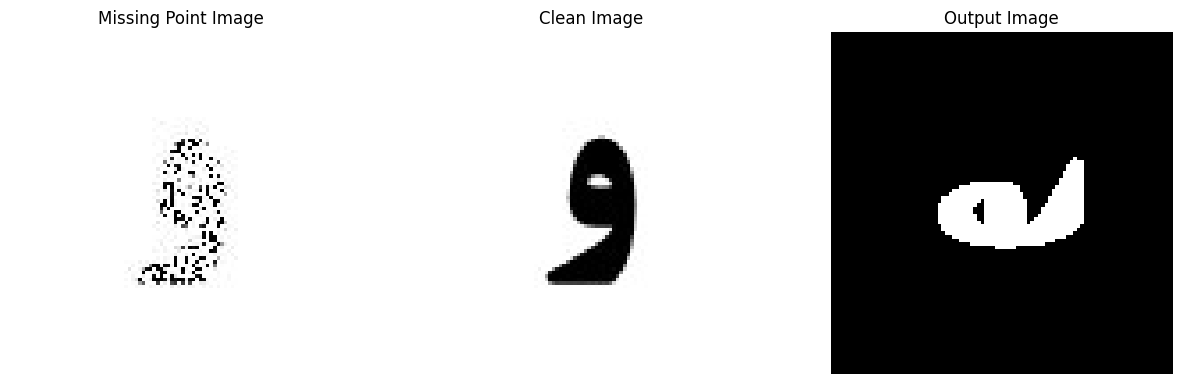

In [64]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def convertImageToBinary(path):
    image = Image.open(path).convert("RGB")  # Ensure the image is in RGB mode
    width, height = image.size
    pix = image.load()
    factor = 100
    binary_representation = []
    for i in range(width):
        for j in range(height):
            red, green, blue = pix[i, j][:3]
            total_intensity = red + green + blue
            if total_intensity > (((255 + factor) // 2) * 3):
                binary_representation.append(-1)  # White pixel
            else:
                binary_representation.append(1)   # Black pixel
    return np.array(binary_representation)

def hamming_network(missing_point_pattern, clean_patterns):
    similarities = [np.dot(missing_point_pattern, clean_pattern) for clean_pattern in clean_patterns]
    best_match_index = np.argmax(similarities)
    return clean_patterns[best_match_index]

def display_images(missing_point_image_path, clean_image_path, output_pattern, width, height):
    missing_point_image = Image.open(missing_point_image_path)
    clean_image = Image.open(clean_image_path)

    # Convert the binary pattern back to an image
    output_image_array = output_pattern.reshape((height, width))
    output_image_array = ((output_image_array + 1) / 2 * 255).astype(np.uint8)  # Normalize to 0–255
    output_image = Image.fromarray(output_image_array, mode="L")

    # Plot the images
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].imshow(missing_point_image)
    axs[0].set_title("Missing Point Image")
    axs[0].axis('off')

    axs[1].imshow(clean_image)
    axs[1].set_title("Clean Image")
    axs[1].axis('off')

    axs[2].imshow(output_image, cmap='gray')
    axs[2].set_title("Output Image")
    axs[2].axis('off')

    plt.show()

# Example usage
clean_image_paths = [
    "/content/1.jpg",
    "/content/2.jpg",
    "/content/3.jpg",
    "/content/4.jpg",
    "/content/5.jpg"
]

missing_point_image_paths = [
    "/content/missing_point1.jpg",
    "/content/missing_point2.jpg",
    "/content/missing_point3.jpg",
    "/content/missing_point4.jpg",
    "/content/missing_point5.jpg"
]

# Convert clean images to binary patterns
clean_patterns = [convertImageToBinary(path) for path in clean_image_paths]

# Compare missing point images to clean patterns
for missing_point_image_path, clean_image_path in zip(missing_point_image_paths, clean_image_paths):
    missing_point_pattern = convertImageToBinary(missing_point_image_path)
    matched_pattern = hamming_network(missing_point_pattern, clean_patterns)

    # Get image dimensions from one of the clean images
    width, height = Image.open(clean_image_path).size

    # Display the missing point image, clean image, and matched output
    display_images(missing_point_image_path, clean_image_path, matched_pattern, width, height)
